# Introduction to Machine Learning, UZH 2018, Group Project
### Group 2: Barbara Capl, Mathias Lüthi, Pamela Matias, Stefanie Rentsch
##       
# 2. Feature Selection 
# A. with RandomForestClassifier (RF)

###        
In this section we use the feature matrices and the response vector that we prepared in chapter 1.  

#### We use two different versions (created in chapter 1):
Version 1: Feature Matrix consists only of the Ratios                                                                        
Version 2: Feature Matrix consists of Ratios + dummy variables for seasonality + other market data
####  We will do Feature Selection and generate feature matrices with only selected n features for each Version above


In [1]:
# hide unnecessary warnings ("depreciation" of packages etc.)
import warnings
warnings.filterwarnings('ignore')

# import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import Imputer
from sklearn.ensemble import RandomForestClassifier

## 2.0. SETTINGS: choose which Feature Matrix (Version 1 or 2) you want to use

#### Choose the Dataset Version you want
VERSION = 1; Feature Matrix with only ratios                                  
VERSION = 2;  Feature Matrix with ratios + saisonality + other market data


In [2]:
############### CHOOSE
VERSION = 1
"""
INSERT NUMBER 1 or 2    
"""



# Defining sel_state variable for usage later and printing text according to your choise   
if VERSION == 1:
    sel_version = 'based on Dataset with only the Ratios Dataset as predicive Features.'
    print('You chose VERSION 1 as working dataset. The following Feature Selection will be therefore' + sel_version)
elif VERSION == 2:
    sel_version = 'based on Dataset with Ratios + Seasonality + other Market Data as predictive Features.'
    print('You chose VERSION 2 as working dataset. The following Feature Selection will be therefore ' + sel_version)
else: raise ValueError('VERSION must be either 1 or 2')

You chose VERSION 1 as working dataset. The following Feature Selection will be thereforebased on Dataset with only the Ratios Dataset as predicive Features.


## 2.1. Preparation

### 2.1.1 Import the Response Vector and the Feature Matrices

In [3]:
# Load in the response vector pre-generated in Chater 1 (Preparation of Data)
y = pd.read_csv('Data/generated_datasets/response_1.csv', sep=',', header=0)

In [4]:
# Load in te feature matrix according to the version you chose in section 2.0. above
if VERSION == 1:
    X = pd.read_csv('Data/generated_datasets/features_ratios_1.csv', sep=',', header=0)
elif VERSION == 2:
    X = pd.read_csv('Data/generated_datasets/features_additional_1.csv', sep=',', header=0)
else: raise ValueError('VERSION value must be either 1 or 2')

### 2.1.2. Train/ Test Split and fill missing values with median

Note: Standardization is not done here because it is not necessary for Random Forest.                                        

### Train/ Test Split

Apply on chosen unsplitted, unimputed and unstandardized feature matrix and response vector.

In [5]:
# Train/test split, into 20% test size and 80% train size because it is a relatively small dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Extract all the feature labels for the respective chosen version
feature_labels = list(X)
print('Type of feature_labels = ' + str(type(feature_labels)), '\n')
#display(np.array(feature_labels))

display(X_train.shape)
display(X_test.shape)

Type of feature_labels = <class 'list'> 



(2836, 71)

(710, 71)

### Filling missing values (NaN)

We use Imputer to fill missing entries with median only AFTER the split, to circumvent the bias that both splits would include information of each other.

In [6]:
# Use a median fill for train set
imp = Imputer(missing_values=np.nan, strategy = 'median' , axis=0)
imputed_dataset = pd.DataFrame(imp.fit_transform(X_train))
imputed_dataset.columns = X_train.columns
imputed_dataset.index = X_train.index
X_train = imputed_dataset

# Use a median fill for the test set
imputed_dataset = pd.DataFrame(imp.fit_transform(X_test))
imputed_dataset.columns = X_test.columns
imputed_dataset.index = X_test.index
X_test = imputed_dataset

display(X_train.shape)
display(X_test.shape)

(2836, 71)

(710, 71)

### 2.2.3. Print out Shape and Form of Feature Matrix and Response Vector

### Train set

In [7]:
# Check if there is the approximately same percentage of '1' the train response vector
print('Ratio of "UP" (Train) = ' + str(round(y_train['0'].sum() / y_train.size, 4)*100) + '%', '\n')

# Print and display properties and head of the training set we will use in the following
print('Shape of Feature Matrix X_train = ' + str(X_train.shape), '\n')
print('Feature Matrix X_train: (below)')
display(X_train.head(3))
print('\n')
print('Response Vector y_train, Shape = '+str(y_train.shape))
display(y_train.head(3))

Ratio of "UP" (Train) = 58.07% 

Shape of Feature Matrix X_train = (2836, 71) 

Feature Matrix X_train: (below)


,CAPEI,bm,evm,pe_op_basic,pe_op_dil,pe_exi,pe_inc,ps,pcf,dpr,...,sale_nwc,rd_sale,adv_sale,staff_sale,accrual,ptb,PEG_trailing,divyield,PEG_1yrforward,PEG_ltgforward
1530,20.773,0.547,10.644,15.468,15.633,18.484,18.484,3.703,9.957,0.623,...,1.4240,0.136,0.058,0.000,0.048,1.811,1.181,0.0354,13.678,5.963
1397,25.089,0.461,9.246,17.203,17.296,39.232,39.232,0.689,8.509,2.175,...,4.9910,0.031,0.000,0.000,0.047,2.189,0.668,0.0398,1.521,5.702
2238,12.337,0.911,12.474,9.135,9.209,13.062,13.062,2.034,1.993,0.337,...,5.8105,0.000,0.024,0.291,0.038,1.076,3.048,0.0268,0.380,2.248




Response Vector y_train, Shape = (2836, 1)


,0
1530,0
1397,1
2238,0


### Test set

In [8]:
# Check if there is the approximately same percentage of '1' in the test response vector
print('Ratio of "UP" (Test)  =  ' + str(round(y_test['0'].sum() / y_test.size, 4)*100) + '%', '\n')

# Print and display properties and head of the training set we will use in the following
print('Shape of Feature Matrix X_test = ' + str(X_test.shape), '\n')
print('Feature Matrix X_test')
display(X_test.head(3))
print('\n')
print('Response Vector y_test, Shape = '+str(y_test.shape))
display(y_test.head(3))

Ratio of "UP" (Test)  =  57.04% 

Shape of Feature Matrix X_test = (710, 71) 

Feature Matrix X_test


,CAPEI,bm,evm,pe_op_basic,pe_op_dil,pe_exi,pe_inc,ps,pcf,dpr,...,sale_nwc,rd_sale,adv_sale,staff_sale,accrual,ptb,PEG_trailing,divyield,PEG_1yrforward,PEG_ltgforward
817,20.983,0.254,8.585,16.127,16.224,16.224,16.224,3.318,10.484,0.287,...,6.768,0.031,0.006,0.000,0.084,4.189,1.022,0.0187,1.414,1.330
2592,21.663,0.235,13.619,16.311,16.489,18.555,18.555,2.379,7.709,0.199,...,7.169,0.000,0.000,0.195,0.039,4.281,1.147,0.0122,1.737,1.572
1475,16.327,0.513,6.716,9.520,9.520,15.681,15.550,3.293,8.490,0.792,...,1.286,0.162,0.054,0.000,0.077,2.198,1.022,0.0343,-0.973,6.149




Response Vector y_test, Shape = (710, 1)


,0
817,1
2592,0
1475,1


###    
## 2.2. Selecting & Extracting Features

### 2.2.1.  Fit forest and show list of best 'n' features according to explanatory value

# ===> MATHIAS LOOP FOR RUNNING THE CODE WITH  random_state 0 to 10 and then select best n features

HEY MATHIAS I HA DUNGER VERSUECHT E LOOP Z MACHE, WEISS ABER NID OBS SO STIMMT^^.
I HAS LEIDER NID SCHÖNER HEREBRACHT, VIU SPASS^^.                                                                            
ACHJA UND ES PAAR COMMENTS CHAME GLOUB WEGCLEANE.

In [9]:
################################## NEW
##################################

# rs = first random state we choose, 
# n = number of best features we want to select out, 
# m = number of random states we want to have tried out
rs = 0
n = 20
m = 10

# define new empty lists
df_lab = []
df_imp = []

# Loop until random_state = rs = 10
while rs < m:
    forest = RandomForestClassifier(random_state = rs)
    forest.max_depth = 6
    forest.fit(X_train, y_train)
    
    # Apply forest fature importance to get an array of feature importances for each feature
    feature_importances = forest.feature_importances_
    #print('ALL FEATURE IMPORTANCES for respective random_state: ')
    #display(feature_importances)
    
    # sort features in line with their importance for the prediction (therefore ::-1)
    indices = np.argsort(feature_importances)[::-1]
    #print('INDICES SORTED: ')
    #display(indices)

    # for loop to make usable fature_labels
    for i in range(n):
        
        # This is a workaround method because feature_labels[indices[:n]] gives the following error message:
        # TypeError: only integer scalar arrays can be converted to a scalar index
        # therefore we make a loop to generate a listwhere the best n features labels are extracted into
        # this list can be used in the plot in the following
        selected_indices = indices[0+i]
        
        # feature_labels of selected indices
        selected_labels = feature_labels[selected_indices]
        # append all
        df_lab.append(selected_labels)
   

    # for loop: i in range(n=15): we want to make datasets of all 15 best features
    for j in range(n):
        df_imp.append(feature_importances[indices[0+j]])

    rs += 1


print('At the end of the loop, rs = ' + str(rs))
#display(np.array(df_lab))
#display(np.array(df_imp))

# Create Pandas DataFrame with the two extractes feature labels and respective feature importances
best_features_overall = pd.DataFrame()
best_features_overall['Feature_Label'] = df_lab
best_features_overall['Feature_Importance'] = df_imp
display(best_features_overall.head())

del rs, m

At the end of the loop, rs = 10


,Feature_Label,Feature_Importance
0,CAPEI,0.064183
1,pcf,0.064088
2,pe_op_basic,0.056039
3,bm,0.055255
4,ptb,0.040446


In [10]:
#### OLD, MAYBE USELESS NOW
# print best n features
#n = 15
#for i in range(n):
 #   print('{0:2d} {1:7s} {2:6.4f}'.format(i + 1, feature_labels[indices[i]], 
                                     #     feature_importances[indices[i]]))
#del i


In [11]:
################################## NEW
##################################

# Group the new dataframe by the labels of the features and sum up each importance for each feature
best_features_cumsum = best_features_overall.groupby('Feature_Label')['Feature_Importance'].sum()
best_features_cumsum = best_features_cumsum.reset_index()
# Rename column
best_features_cumsum.rename(columns= {'Feature_Importance':'Feat_Cum_Importance'},inplace = True)
# Show types
display(best_features_cumsum.dtypes)

# Sort Feature Importance in 
best_features_cumsum.sort_values(by=['Feat_Cum_Importance'], ascending = False, inplace = True)
best_features_cumsum.reset_index(drop=True, inplace = True)

# Print the resulting dataframe
print('This are the best features with their respective cumulative importance over all 10 random_states:')
display(best_features_cumsum.head(n))

##### Double Check if the results are correct: Insert the Feature you want to check (e.g. 'ASKHI')
# Compare result with the result in the dataframe
sum1 = best_features_overall.loc[best_features_overall['Feature_Label'] == 'ASKHI'].sum()
display(sum1)



Feature_Label           object
Feat_Cum_Importance    float64
dtype: object

This are the best features with their respective cumulative importance over all 10 random_states:


,Feature_Label,Feat_Cum_Importance
0,pe_op_dil,0.521871
1,pe_op_basic,0.438832
2,CAPEI,0.412361
3,pe_exi,0.399039
4,pcf,0.372741
5,divyield,0.349554
6,bm,0.349037
7,PEG_ltgforward,0.324193
8,ptb,0.309132
9,pe_inc,0.251292


Feature_Label         0.0
Feature_Importance    0.0
dtype: float64

# ! PROBLEM: THE OVERALL BEST 4 FEATURES ARE WEIGHTED RETURNS!


### 2.2.2.  Plotting results

HERE: FOR SELECTION INCLUDING WEIGHTED RETURNS
    OTHERWISE SET n = 15 + 4

sum_fat_imp: 


0     0.521871
1     0.960703
2     1.373065
3     1.772103
4     2.144845
5     2.494399
6     2.843436
7     3.167629
8     3.476761
9     3.728054
10    3.973816
11    4.208448
12    4.438992
13    4.534986
14    4.616472
15    4.692260
16    4.765239
17    4.838156
18    4.910026
19    4.971808
Name: Feat_Cum_Importance, dtype: float64

individual_feat_imp: 


0     0.521871
1     0.438832
2     0.412361
3     0.399039
4     0.372741
5     0.349554
6     0.349037
7     0.324193
8     0.309132
9     0.251292
10    0.245762
11    0.234632
12    0.230544
13    0.095994
14    0.081486
15    0.075788
16    0.072979
17    0.072917
18    0.071870
19    0.061782
Name: Feat_Cum_Importance, dtype: float64

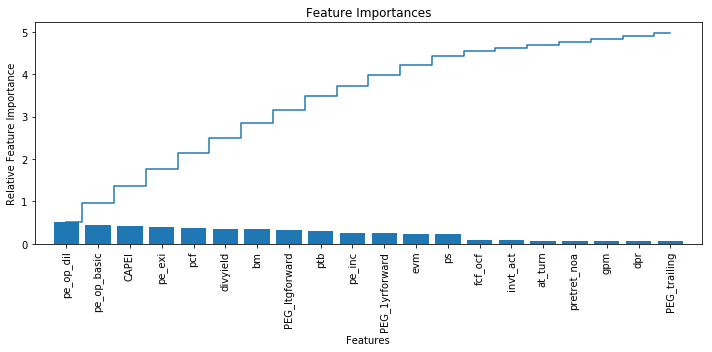

In [12]:
################################## NEW
##################################
n = n

### OLD, when we made just one randomstate
# Get cumsum of the n most important features
#sum_feat_imp = np.cumsum(feature_importances)[:n]
#display(sum_feat_imp)
# Sort feature importances
#feat_imp = np.sort(feature_importances)[::-1]
#display(feat_imp)

### NEW
# Get cumulative importance of n most important features
sum_feat_imp = np.cumsum(best_features_cumsum.Feat_Cum_Importance)[:n]
print('sum_fat_imp: ')
display(sum_feat_imp)
individual_feat_imp = best_features_cumsum.Feat_Cum_Importance[:n]
print('individual_feat_imp: ')
display(individual_feat_imp)
# Get corresponsing feature labels
feat_lab = best_features_cumsum.Feature_Label[:n]

# Plot Feature Importance (both cumulative and individual)
plt.figure(figsize = (10, 5))
plt.title('Feature Importances')
plt.bar(range(n), individual_feat_imp, align = 'center')
plt.xticks(range(n), feat_lab, rotation = 90)
plt.xlim([-1, n])
plt.xlabel('Features')
plt.ylabel('Relative Feature Importance')
plt.step(range(n), sum_feat_imp, where = 'mid', label = 'Cumulative Feature Importance')
plt.tight_layout();

### 2.2.3. Extract best 'n' Variables and save into new Feature Matrices


### Extract

Automatically etract the chosen number n best variables directly from the feature matrices X_train and X_test into new ones X_train_f and X_test_f.                                                                                                                
The f in the end stands for feature selection with random'f'orest.


In [13]:
################################## NEW
##################################

# Extract the overall n best features INCLUDING the weighted returns
# remember, we set n = 15 in the beginning for the randomforest in section 2.2.1.
final_selection1 = best_features_cumsum.Feature_Label[0:n]
print('Selected Features including weighted returns:')
display(final_selection1)
print("")
# save as list for further use
final_selection1 = list(final_selection1)


# Extract the overall n best features EXCLUDING the weighted returns
m = n + 4
final_selection2 = best_features_cumsum.Feature_Label[4:m]
final_selection2.reset_index(drop = True, inplace = True)
print('Selected Features without weighted returns:')
display(final_selection2)
# save as list for further use
final_selection2 = list(final_selection2)

Selected Features including weighted returns:


0          pe_op_dil
1        pe_op_basic
2              CAPEI
3             pe_exi
4                pcf
5           divyield
6                 bm
7     PEG_ltgforward
8                ptb
9             pe_inc
10    PEG_1yrforward
11               evm
12                ps
13           fcf_ocf
14          invt_act
15           at_turn
16       pretret_noa
17               gpm
18               dpr
19      PEG_trailing
Name: Feature_Label, dtype: object


Selected Features without weighted returns:


0                pcf
1           divyield
2                 bm
3     PEG_ltgforward
4                ptb
5             pe_inc
6     PEG_1yrforward
7                evm
8                 ps
9            fcf_ocf
10          invt_act
11           at_turn
12       pretret_noa
13               gpm
14               dpr
15      PEG_trailing
16         curr_debt
17        short_debt
18              roce
19             GProf
Name: Feature_Label, dtype: object

In [14]:
################################## NEW
##################################

# features including volume weighted returns
best_features1 = final_selection1
# feaures excluding volume weighted returns
best_features2 = final_selection2

# extract features from feature matrix
X_train_f1 = X_train[best_features1]
X_train_f = X_train[best_features2]
X_test_f1 = X_test[best_features1]
X_test_f = X_test[best_features2]

#feature_labels_f = X_train_f.columns[:]

In [15]:
#### OLD

# generate new empty list for best features to be extracted into
#best_features = []

# loop to append best n features onto the new list best_features
#n = 15
#for i in range(n):
 #   best_features.append(feature_labels[indices[i]])
#del i

# extract data of train and test feature matrix where column names are the same as those of the n best features
# The f at the end of the datasets refer to the fact that the features were selected with random'f'orest
#X_train_f = X_train[best_features]
#X_test_f = X_test[best_features]
#feature_labels_f = X_train_f.columns[:]

# display and print results
#print('Best Features after Random Forest are: ', '\n')
#display(np.array(best_features))
#print('Head of X_train_f is: (below) ', '\n')
#display(X_train_f.head(2))
#print('\n')
#print('Extracted feature labels are: (below)')
#display(feature_labels_f[:])

In [16]:
################################## NEW
##################################

# Show feature matrices (train, test) after feature selection
print("")
print('Feature Matrix with selected Features (Train):')
display(X_train_f1.head(2))
display(X_train_f1.shape)
display(X_train_f.head(2))
display(X_train_f.shape)


print("")
print('Feature Matrix with selected Features (Test):')
display(X_test_f1.head(2))
display(X_test_f1.shape)
display(X_test_f.head(2))
display(X_train_f.shape)


Feature Matrix with selected Features (Train):


,pe_op_dil,pe_op_basic,CAPEI,pe_exi,pcf,divyield,bm,PEG_ltgforward,ptb,pe_inc,PEG_1yrforward,evm,ps,fcf_ocf,invt_act,at_turn,pretret_noa,gpm,dpr,PEG_trailing
1530,15.633,15.468,20.773,18.484,9.957,0.0354,0.547,5.963,1.811,18.484,13.678,10.644,3.703,0.932,0.108,0.291,0.332,0.843,0.623,1.181
1397,17.296,17.203,25.089,39.232,8.509,0.0398,0.461,5.702,2.189,39.232,1.521,9.246,0.689,0.441,0.368,0.815,0.146,0.201,2.175,0.668


(2836, 20)

,pcf,divyield,bm,PEG_ltgforward,ptb,pe_inc,PEG_1yrforward,evm,ps,fcf_ocf,invt_act,at_turn,pretret_noa,gpm,dpr,PEG_trailing,curr_debt,short_debt,roce,GProf
1530,9.957,0.0354,0.547,5.963,1.811,18.484,13.678,10.644,3.703,0.932,0.108,0.291,0.332,0.843,0.623,1.181,0.237,0.173,0.140,0.245
1397,8.509,0.0398,0.461,5.702,2.189,39.232,1.521,9.246,0.689,0.441,0.368,0.815,0.146,0.201,2.175,0.668,0.269,0.084,0.105,0.164


(2836, 20)


Feature Matrix with selected Features (Test):


,pe_op_dil,pe_op_basic,CAPEI,pe_exi,pcf,divyield,bm,PEG_ltgforward,ptb,pe_inc,PEG_1yrforward,evm,ps,fcf_ocf,invt_act,at_turn,pretret_noa,gpm,dpr,PEG_trailing
817,16.224,16.127,20.983,16.224,10.484,0.0187,0.254,1.330,4.189,16.224,1.414,8.585,3.318,0.863,0.025,0.828,1.148,0.428,0.287,1.022
2592,16.489,16.311,21.663,18.555,7.709,0.0122,0.235,1.572,4.281,18.555,1.737,13.619,2.379,0.902,0.157,0.223,0.358,0.279,0.199,1.147


(710, 20)

,pcf,divyield,bm,PEG_ltgforward,ptb,pe_inc,PEG_1yrforward,evm,ps,fcf_ocf,invt_act,at_turn,pretret_noa,gpm,dpr,PEG_trailing,curr_debt,short_debt,roce,GProf
817,10.484,0.0187,0.254,1.330,4.189,16.224,1.414,8.585,3.318,0.863,0.025,0.828,1.148,0.428,0.287,1.022,0.510,0.025,0.364,0.354
2592,7.709,0.0122,0.235,1.572,4.281,18.555,1.737,13.619,2.379,0.902,0.157,0.223,0.358,0.279,0.199,1.147,0.453,0.106,0.108,0.062


(2836, 20)

### Save

Feature Matrices and Response Vectors after Train/Test Split and after Feature Selection are saved as csv:             
Version 1 (ratios as explanatory variables)                                                                          
Version 2 (ratios + seasonality + market data).

In [17]:
# Save generated splitted datasets (feature matrices and response vectors) after having relevant feature selected
# The 'f' at the end of the name of the dataset stands for the fact that features have been selected with random'f'orest
if VERSION == 1:
    X_train_f1.to_csv('Data/generated_splits/features_selected_randomforest/X1_train_f.csv', index = False)
    X_test_f1.to_csv('Data/generated_splits/features_selected_randomforest/X1_test_f.csv', index = False)
    y_train.to_csv('Data/generated_splits/features_selected_randomforest/y1_train_f.csv', index = False)
    y_test.to_csv('Data/generated_splits/features_selected_randomforest/y1_test_f.csv', index = False)
elif VERSION == 2:
    X_train_f1.to_csv('Data/generated_splits/features_selected_randomforest/X2_train_f.csv', index = False)
    X_test_f1.to_csv('Data/generated_splits/features_selected_randomforest/X2_test_f.csv', index = False)
    y_train.to_csv('Data/generated_splits/features_selected_randomforest/y2_train_f.csv', index = False)
    y_test.to_csv('Data/generated_splits/features_selected_randomforest/y2_test_f.csv', index = False)
else: raise ValueError('VERSION value must be either 1 or 2')

In [18]:
display(X_train_f1.shape)
display(X_test_f1.shape)

(2836, 20)

(710, 20)